In [28]:
import pandas as pd
# Load data
users_df = pd.read_csv('/home/nkama/masters_thesis_project/thesis/partially_synthetic/notebooks/test_users_data.csv')
events_df = pd.read_csv("/home/nkama/masters_thesis_project/thesis/partially_synthetic/notebooks/test_events_data.csv")
interactions_df = pd.read_csv('/home/nkama/masters_thesis_project/thesis/partially_synthetic/notebooks/test_interactions_data.csv')
# Renaming columns in users_df
users_df.rename(columns={
    'lat': 'user_lat',
    'lng': 'user_lon',
    'location': 'user_city',
    'joinedAt': 'signup_date'
}, inplace=True)

# Renaming columns in events_df
events_df.rename(columns={
    #'category': 'event_type',
    'lat': 'event_lat',
    'lng': 'event_lon',
    'city': 'event_city',
    'weather_description': 'weather_condition',
    'temperature_2m_mean': 'temperature'
}, inplace=True)

# Renaming columns in interactions_df
interactions_df.rename(columns={
    'distance_to_event': 'interaction_distance_to_event'
}, inplace=True)

Loading datasets...
Datasets loaded successfully!
Users: 50,000
Events: 10,000
Interactions: 500,000

EXPLORING USERS DATASET

Shape: (50000, 12)
Memory usage: 21.93 MB

Column Info:
user_id                       object
user_lat                     float64
user_lon                     float64
user_city                     object
indoor_outdoor_preference     object
age                            int64
user_interests                object
signup_date                   object
social_connectedness           int64
user_weather_condition        object
user_temperature             float64
user_precipitation           float64
dtype: object

Missing Values:
No missing values!

First 5 rows:
  user_id   user_lat   user_lon user_city indoor_outdoor_preference  age  \
0  EJ688Y  49.307314   2.584194     Paris                   outdoor   40   
1  RA189K  40.727034 -73.913585  New York                   outdoor   25   
2  GM435P  25.479933  55.710299     Dubai                    indoor   30   
3  Q

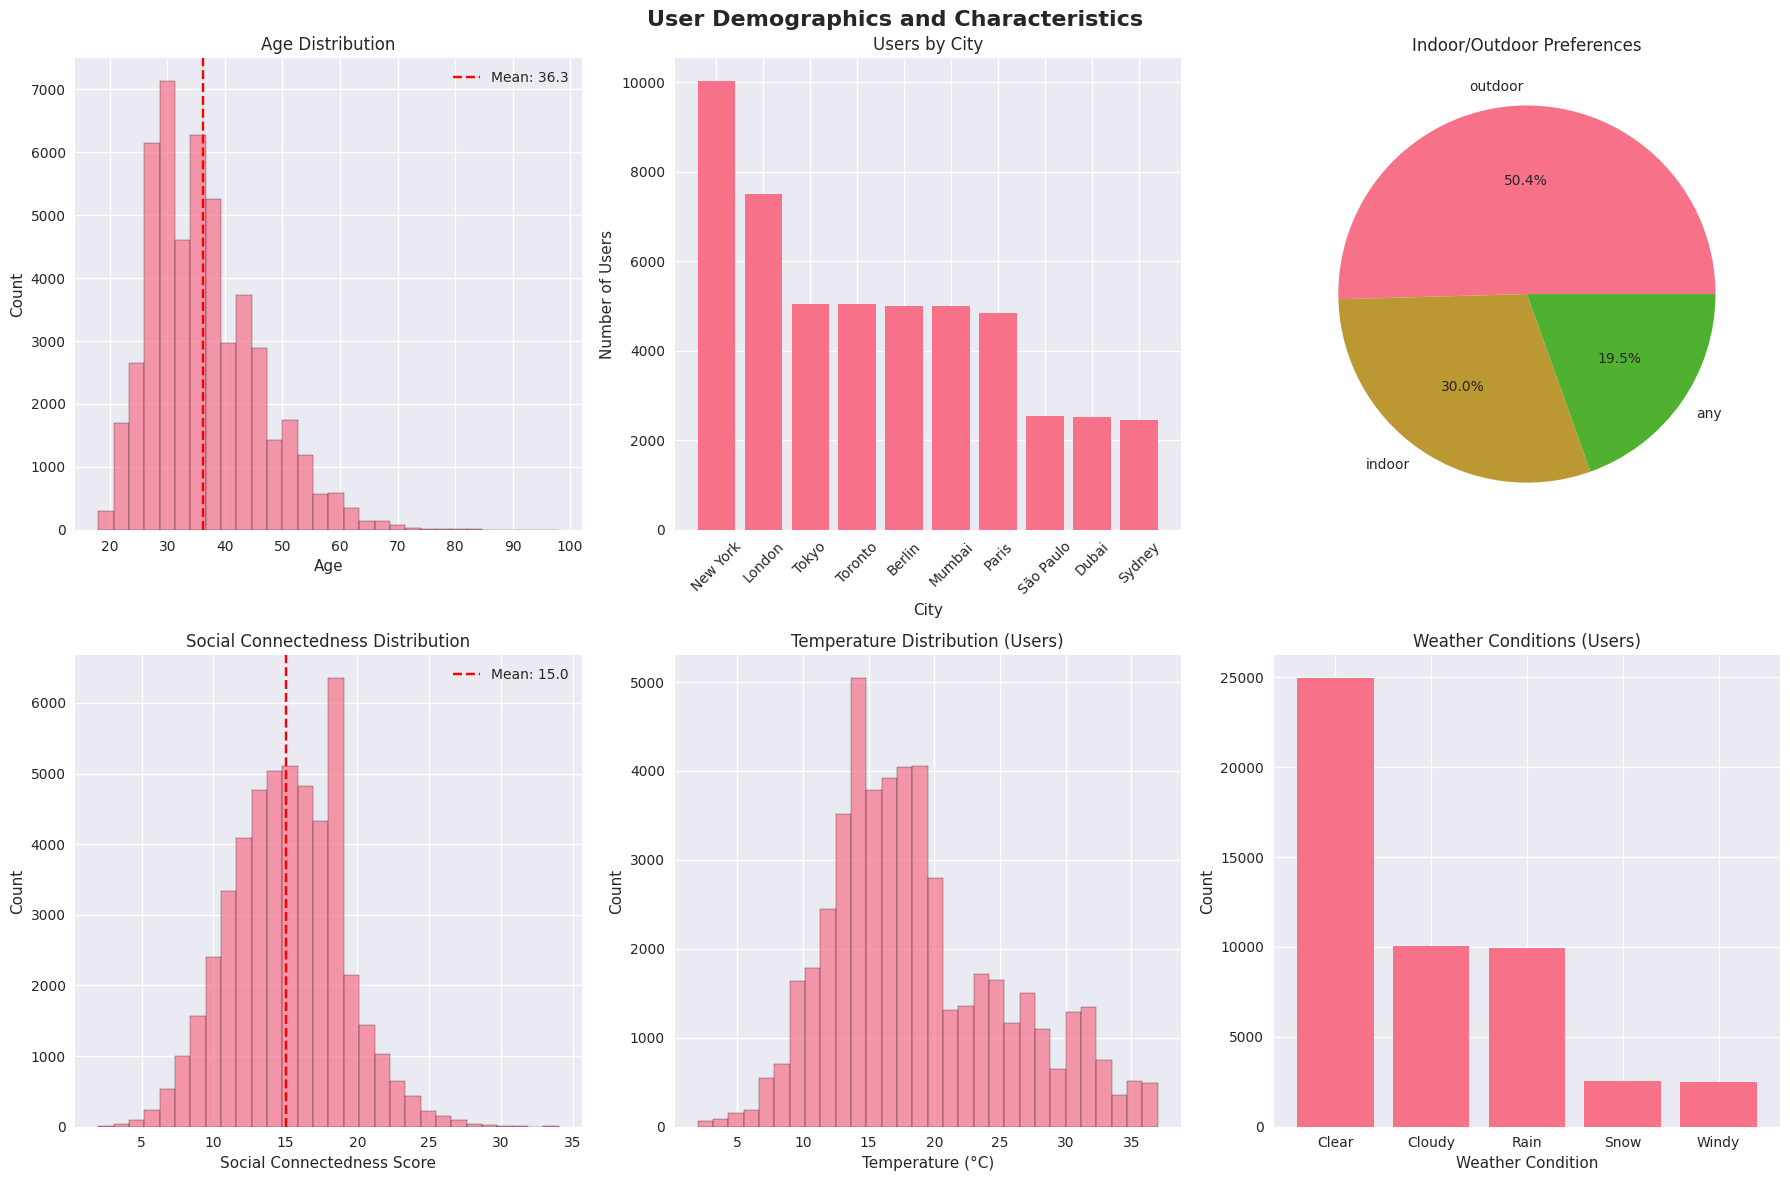


User Interests Analysis:
Most popular interests:
travel        15126
sports        15102
food          15082
tech          15056
music         15014
art           14974
cinema        14957
fitness       14944
literature    14890
fashion       14814
Name: count, dtype: int64


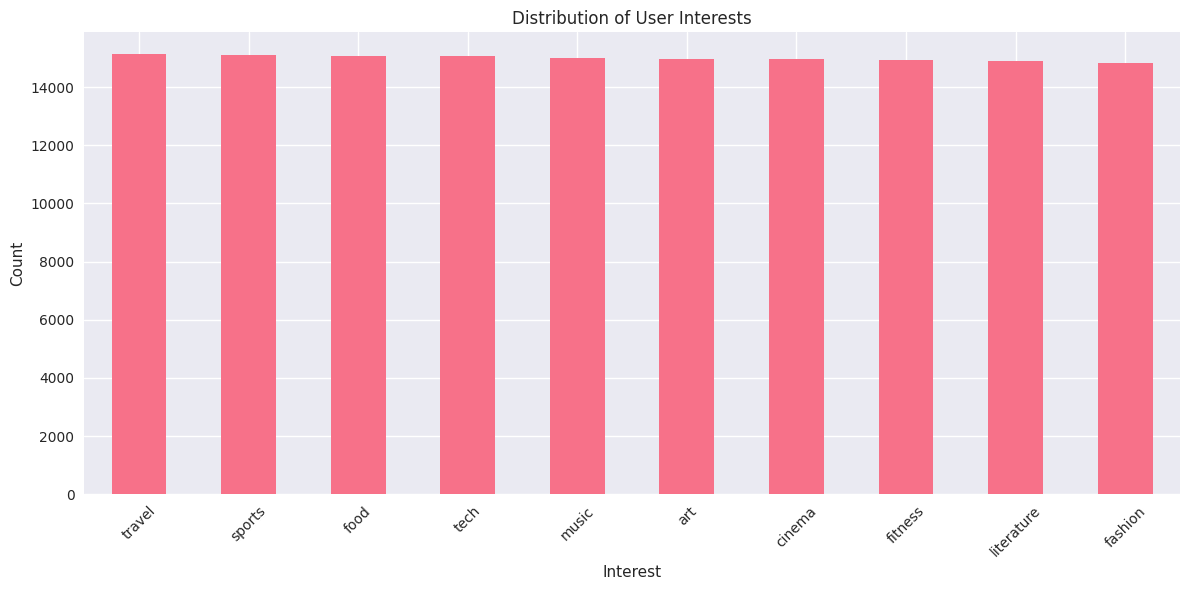

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style for better looking plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load the datasets
print("Loading datasets...")
events_df = pd.read_csv("/home/nkama/masters_thesis_project/thesis/fully_synthetic_data/data/events.csv")
users_df = pd.read_csv("/home/nkama/masters_thesis_project/thesis/fully_synthetic_data/data/users.csv")
interactions_df = pd.read_csv("/home/nkama/masters_thesis_project/thesis/fully_synthetic_data/data/interactions.csv")

print("Datasets loaded successfully!")
print(f"Users: {len(users_df):,}")
print(f"Events: {len(events_df):,}")
print(f"Interactions: {len(interactions_df):,}")

# ============================================================================
# BASIC DATA EXPLORATION
# ============================================================================

def explore_dataframe(df, name):
    """Comprehensive exploration of a dataframe"""
    print(f"\n{'='*60}")
    print(f"EXPLORING {name.upper()} DATASET")
    print(f"{'='*60}")
    
    print(f"\nShape: {df.shape}")
    print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
    print(f"\nColumn Info:")
    print(df.dtypes)
    
    print(f"\nMissing Values:")
    missing = df.isnull().sum()
    if missing.sum() > 0:
        print(missing[missing > 0])
    else:
        print("No missing values!")
    
    print(f"\nFirst 5 rows:")
    print(df.head())
    
    # Numerical columns summary
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    if len(numerical_cols) > 0:
        print(f"\nNumerical Columns Summary:")
        print(df[numerical_cols].describe())
    
    # Categorical columns summary
    categorical_cols = df.select_dtypes(include=['object']).columns
    if len(categorical_cols) > 0:
        print(f"\nCategorical Columns Summary:")
        for col in categorical_cols:
            unique_count = df[col].nunique()
            print(f"{col}: {unique_count} unique values")
            if unique_count <= 20:  # Show value counts for columns with few unique values
                print(df[col].value_counts().head(10))
                print()

# Explore each dataset
explore_dataframe(users_df, "USERS")
explore_dataframe(events_df, "EVENTS")
explore_dataframe(interactions_df, "INTERACTIONS")

# ============================================================================
# USERS ANALYSIS
# ============================================================================

print(f"\n{'='*60}")
print("USERS ANALYSIS")
print(f"{'='*60}")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('User Demographics and Characteristics', fontsize=16, fontweight='bold')

# Age distribution
axes[0, 0].hist(users_df['age'], bins=30, alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Count')
axes[0, 0].axvline(users_df['age'].mean(), color='red', linestyle='--', 
                   label=f'Mean: {users_df["age"].mean():.1f}')
axes[0, 0].legend()

# City distribution
city_counts = users_df['user_city'].value_counts()
axes[0, 1].bar(city_counts.index, city_counts.values)
axes[0, 1].set_title('Users by City')
axes[0, 1].set_xlabel('City')
axes[0, 1].set_ylabel('Number of Users')
axes[0, 1].tick_params(axis='x', rotation=45)

# Indoor/Outdoor preference
pref_counts = users_df['indoor_outdoor_preference'].value_counts()
axes[0, 2].pie(pref_counts.values, labels=pref_counts.index, autopct='%1.1f%%')
axes[0, 2].set_title('Indoor/Outdoor Preferences')

# Social connectedness
axes[1, 0].hist(users_df['social_connectedness'], bins=30, alpha=0.7, edgecolor='black')
axes[1, 0].set_title('Social Connectedness Distribution')
axes[1, 0].set_xlabel('Social Connectedness Score')
axes[1, 0].set_ylabel('Count')
axes[1, 0].axvline(users_df['social_connectedness'].mean(), color='red', linestyle='--',
                   label=f'Mean: {users_df["social_connectedness"].mean():.1f}')
axes[1, 0].legend()

# Temperature distribution
axes[1, 1].hist(users_df['user_temperature'], bins=30, alpha=0.7, edgecolor='black')
axes[1, 1].set_title('Temperature Distribution (Users)')
axes[1, 1].set_xlabel('Temperature (°C)')
axes[1, 1].set_ylabel('Count')

# Weather condition distribution
weather_counts = users_df['user_weather_condition'].value_counts()
axes[1, 2].bar(weather_counts.index, weather_counts.values)
axes[1, 2].set_title('Weather Conditions (Users)')
axes[1, 2].set_xlabel('Weather Condition')
axes[1, 2].set_ylabel('Count')

plt.tight_layout()
plt.show()

# Interest analysis
print("\nUser Interests Analysis:")
all_interests = []
for interests in users_df['user_interests']:
    all_interests.extend(interests.split(','))

interest_counts = pd.Series(all_interests).value_counts()
print(f"Most popular interests:")
print(interest_counts)

plt.figure(figsize=(12, 6))
interest_counts.plot(kind='bar')
plt.title('Distribution of User Interests')
plt.xlabel('Interest')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


EVENTS ANALYSIS


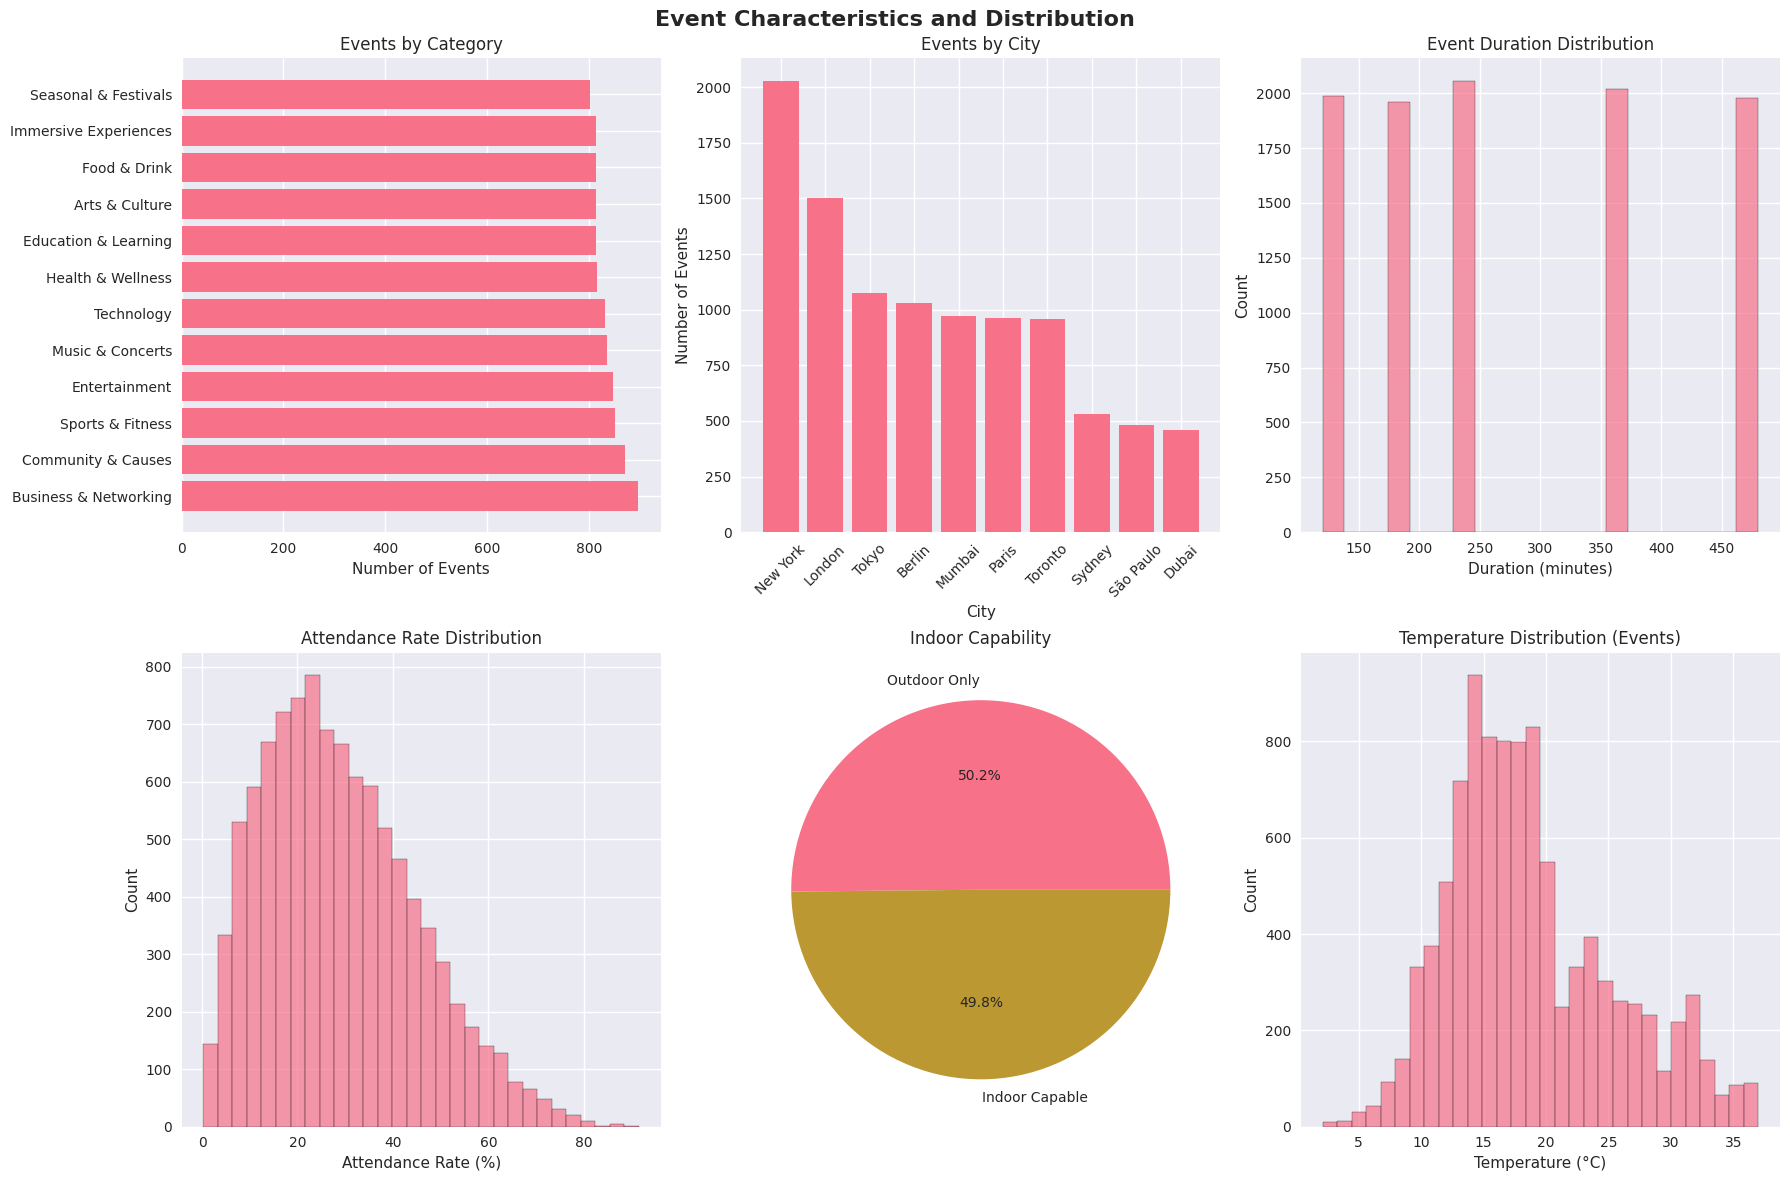

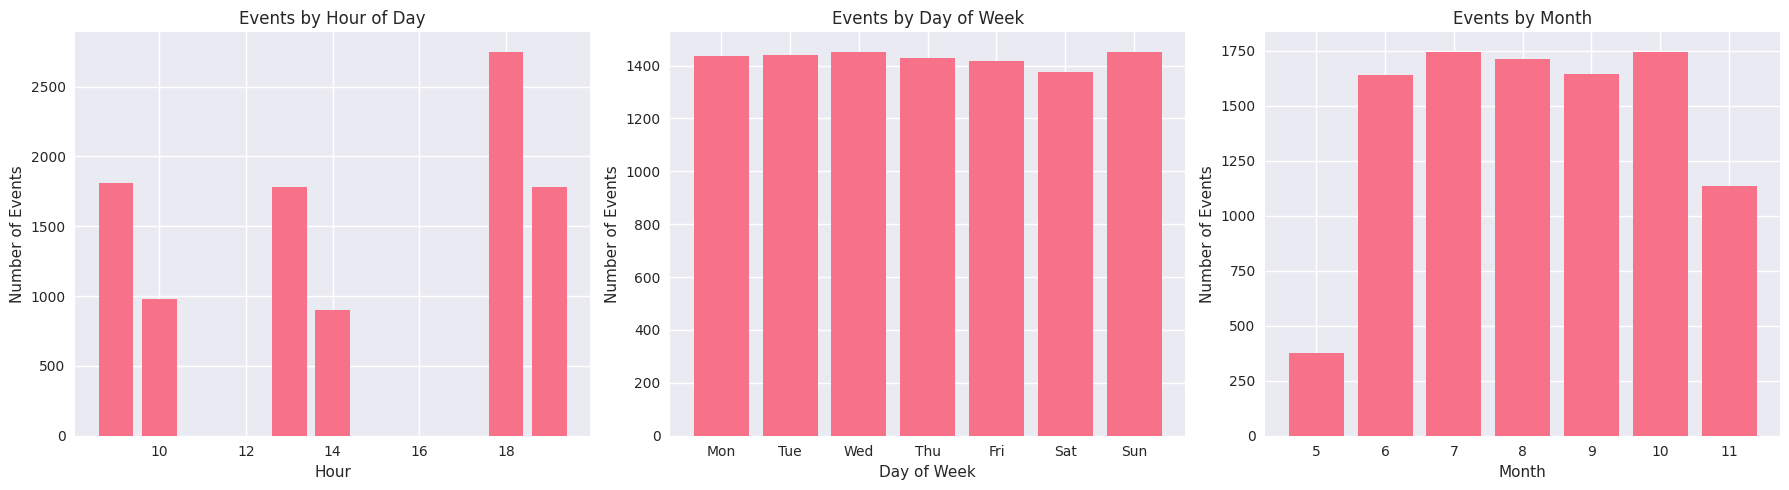

In [3]:

# ============================================================================
# EVENTS ANALYSIS
# ============================================================================

print(f"\n{'='*60}")
print("EVENTS ANALYSIS")
print(f"{'='*60}")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Event Characteristics and Distribution', fontsize=16, fontweight='bold')

# Event categories
category_counts = events_df['category'].value_counts()
axes[0, 0].barh(category_counts.index, category_counts.values)
axes[0, 0].set_title('Events by Category')
axes[0, 0].set_xlabel('Number of Events')

# Events by city
event_city_counts = events_df['event_city'].value_counts()
axes[0, 1].bar(event_city_counts.index, event_city_counts.values)
axes[0, 1].set_title('Events by City')
axes[0, 1].set_xlabel('City')
axes[0, 1].set_ylabel('Number of Events')
axes[0, 1].tick_params(axis='x', rotation=45)

# Duration distribution
axes[0, 2].hist(events_df['duration'], bins=20, alpha=0.7, edgecolor='black')
axes[0, 2].set_title('Event Duration Distribution')
axes[0, 2].set_xlabel('Duration (minutes)')
axes[0, 2].set_ylabel('Count')

# Attendance rate distribution
axes[1, 0].hist(events_df['attendance_rate'], bins=30, alpha=0.7, edgecolor='black')
axes[1, 0].set_title('Attendance Rate Distribution')
axes[1, 0].set_xlabel('Attendance Rate (%)')
axes[1, 0].set_ylabel('Count')

# Indoor capability
indoor_counts = events_df['event_indoor_capability'].value_counts()
axes[1, 1].pie(indoor_counts.values, labels=['Outdoor Only', 'Indoor Capable'], autopct='%1.1f%%')
axes[1, 1].set_title('Indoor Capability')

# Temperature distribution for events
axes[1, 2].hist(events_df['temperature'], bins=30, alpha=0.7, edgecolor='black')
axes[1, 2].set_title('Temperature Distribution (Events)')
axes[1, 2].set_xlabel('Temperature (°C)')
axes[1, 2].set_ylabel('Count')

plt.tight_layout()
plt.show()

# Event timing analysis
events_df['start_time'] = pd.to_datetime(events_df['start_time'])
events_df['hour'] = events_df['start_time'].dt.hour
events_df['day_of_week'] = events_df['start_time'].dt.dayofweek
events_df['month'] = events_df['start_time'].dt.month

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Hour distribution
hour_counts = events_df['hour'].value_counts().sort_index()
axes[0].bar(hour_counts.index, hour_counts.values)
axes[0].set_title('Events by Hour of Day')
axes[0].set_xlabel('Hour')
axes[0].set_ylabel('Number of Events')

# Day of week distribution
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
dow_counts = events_df['day_of_week'].value_counts().sort_index()
axes[1].bar(range(7), dow_counts.values)
axes[1].set_title('Events by Day of Week')
axes[1].set_xlabel('Day of Week')
axes[1].set_ylabel('Number of Events')
axes[1].set_xticks(range(7))
axes[1].set_xticklabels(day_names)

# Month distribution
month_counts = events_df['month'].value_counts().sort_index()
axes[2].bar(month_counts.index, month_counts.values)
axes[2].set_title('Events by Month')
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Number of Events')

plt.tight_layout()
plt.show()



INTERACTIONS ANALYSIS


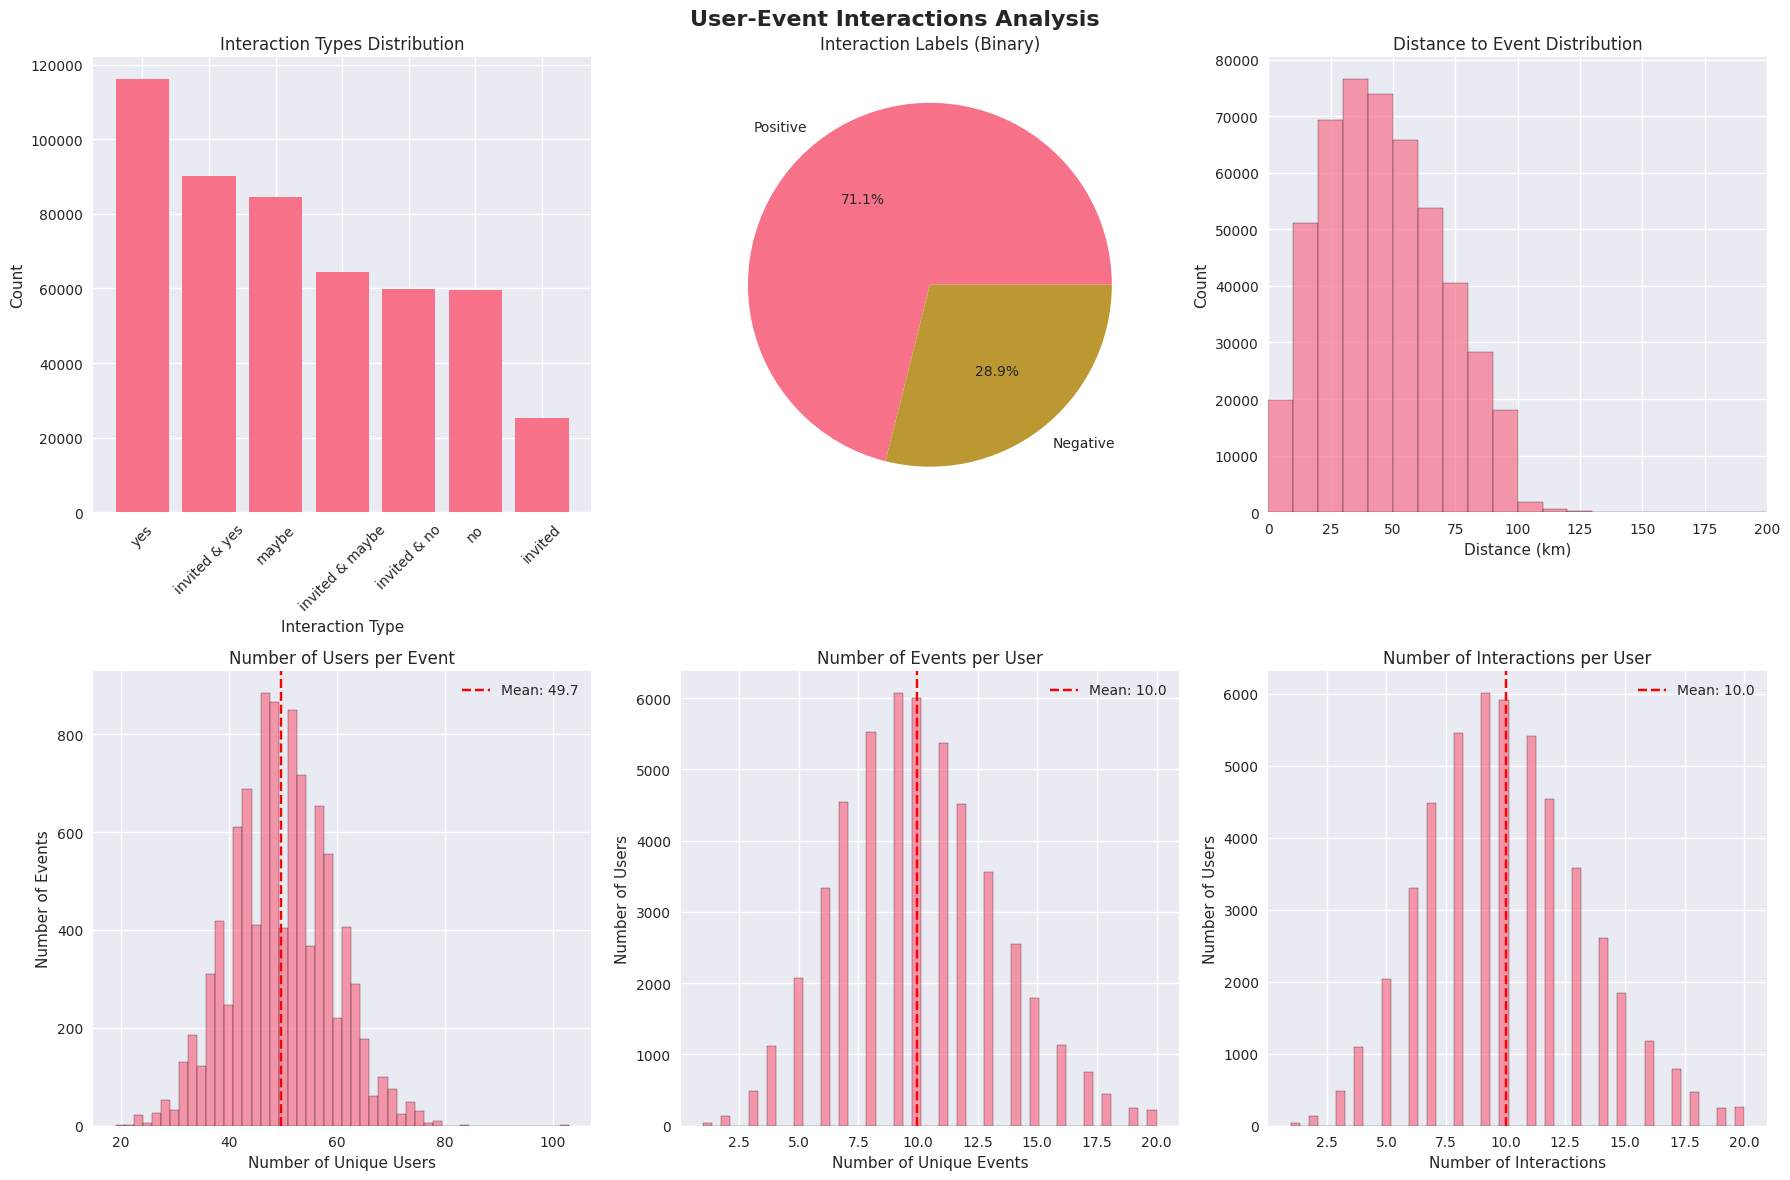

In [4]:

# ============================================================================
# INTERACTIONS ANALYSIS
# ============================================================================

print(f"\n{'='*60}")
print("INTERACTIONS ANALYSIS")
print(f"{'='*60}")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('User-Event Interactions Analysis', fontsize=16, fontweight='bold')

# Interaction types
interaction_counts = interactions_df['interaction_type'].value_counts()
axes[0, 0].bar(interaction_counts.index, interaction_counts.values)
axes[0, 0].set_title('Interaction Types Distribution')
axes[0, 0].set_xlabel('Interaction Type')
axes[0, 0].set_ylabel('Count')
axes[0, 0].tick_params(axis='x', rotation=45)

# Interaction labels (binary)
label_counts = interactions_df['interaction_label'].value_counts()
axes[0, 1].pie(label_counts.values, labels=['Positive', 'Negative'], autopct='%1.1f%%')
axes[0, 1].set_title('Interaction Labels (Binary)')

# Distance distribution
axes[0, 2].hist(interactions_df['interaction_distance_to_event'], bins=50, alpha=0.7, edgecolor='black')
axes[0, 2].set_title('Distance to Event Distribution')
axes[0, 2].set_xlabel('Distance (km)')
axes[0, 2].set_ylabel('Count')
axes[0, 2].set_xlim(0, 200)  # Focus on shorter distances

# Users per event
users_per_event = interactions_df.groupby('event_id')['user_id'].nunique()
axes[1, 0].hist(users_per_event, bins=50, alpha=0.7, edgecolor='black')
axes[1, 0].set_title('Number of Users per Event')
axes[1, 0].set_xlabel('Number of Unique Users')
axes[1, 0].set_ylabel('Number of Events')
axes[1, 0].axvline(users_per_event.mean(), color='red', linestyle='--',
                   label=f'Mean: {users_per_event.mean():.1f}')
axes[1, 0].legend()

# Events per user
events_per_user = interactions_df.groupby('user_id')['event_id'].nunique()
axes[1, 1].hist(events_per_user, bins=50, alpha=0.7, edgecolor='black')
axes[1, 1].set_title('Number of Events per User')
axes[1, 1].set_xlabel('Number of Unique Events')
axes[1, 1].set_ylabel('Number of Users')
axes[1, 1].axvline(events_per_user.mean(), color='red', linestyle='--',
                   label=f'Mean: {events_per_user.mean():.1f}')
axes[1, 1].legend()

# Interactions per user
interactions_per_user = interactions_df['user_id'].value_counts()
axes[1, 2].hist(interactions_per_user, bins=50, alpha=0.7, edgecolor='black')
axes[1, 2].set_title('Number of Interactions per User')
axes[1, 2].set_xlabel('Number of Interactions')
axes[1, 2].set_ylabel('Number of Users')
axes[1, 2].axvline(interactions_per_user.mean(), color='red', linestyle='--',
                   label=f'Mean: {interactions_per_user.mean():.1f}')
axes[1, 2].legend()

plt.tight_layout()
plt.show()



DETAILED USER-EVENT RELATIONSHIP ANALYSIS

Users per Event Statistics:
Mean: 49.74
Median: 49.00
Standard Deviation: 9.16
Min: 19
Max: 103
25th Percentile: 44.00
75th Percentile: 56.00

Events per User Statistics:
Mean: 9.97
Median: 10.00
Standard Deviation: 3.29
Min: 1
Max: 20
25th Percentile: 8.00
75th Percentile: 12.00


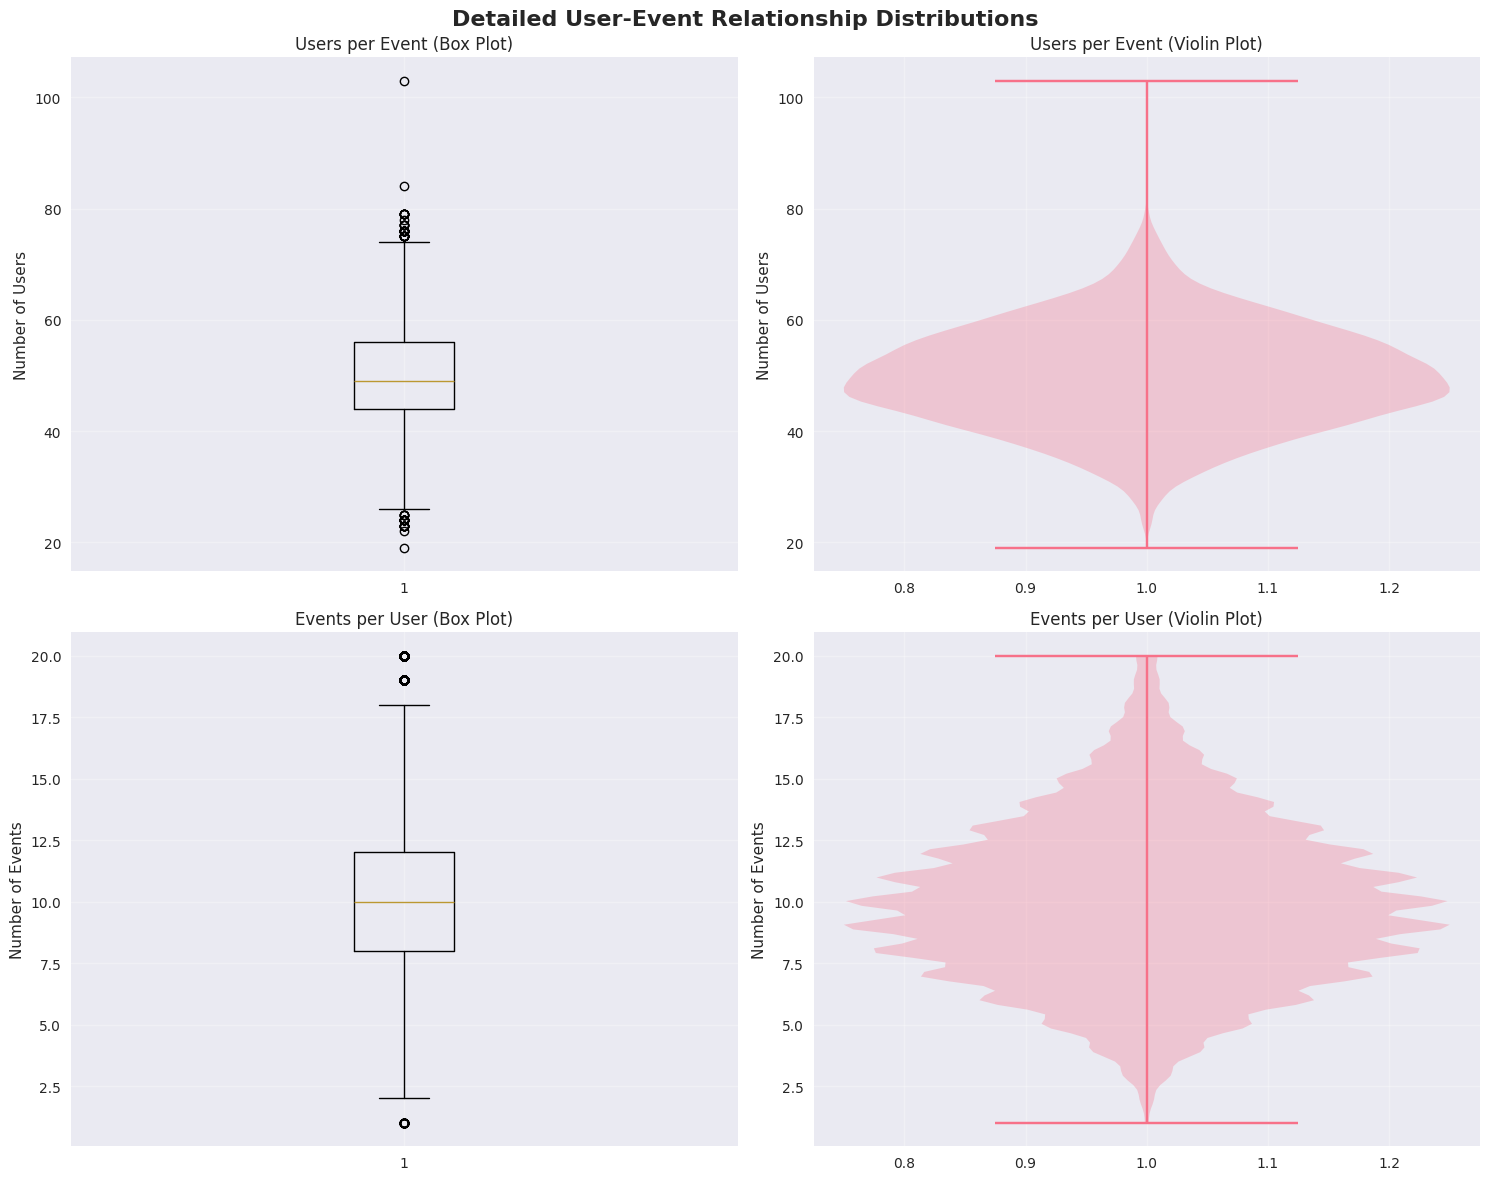

In [5]:

# ============================================================================
# DETAILED USERS PER EVENT AND EVENTS PER USER ANALYSIS
# ============================================================================

print(f"\n{'='*60}")
print("DETAILED USER-EVENT RELATIONSHIP ANALYSIS")
print(f"{'='*60}")

# Calculate detailed statistics
print(f"\nUsers per Event Statistics:")
print(f"Mean: {users_per_event.mean():.2f}")
print(f"Median: {users_per_event.median():.2f}")
print(f"Standard Deviation: {users_per_event.std():.2f}")
print(f"Min: {users_per_event.min()}")
print(f"Max: {users_per_event.max()}")
print(f"25th Percentile: {users_per_event.quantile(0.25):.2f}")
print(f"75th Percentile: {users_per_event.quantile(0.75):.2f}")

print(f"\nEvents per User Statistics:")
print(f"Mean: {events_per_user.mean():.2f}")
print(f"Median: {events_per_user.median():.2f}")
print(f"Standard Deviation: {events_per_user.std():.2f}")
print(f"Min: {events_per_user.min()}")
print(f"Max: {events_per_user.max()}")
print(f"25th Percentile: {events_per_user.quantile(0.25):.2f}")
print(f"75th Percentile: {events_per_user.quantile(0.75):.2f}")

# Create detailed box plots and violin plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Detailed User-Event Relationship Distributions', fontsize=16, fontweight='bold')

# Box plot for users per event
axes[0, 0].boxplot(users_per_event, vert=True)
axes[0, 0].set_title('Users per Event (Box Plot)')
axes[0, 0].set_ylabel('Number of Users')
axes[0, 0].grid(True, alpha=0.3)

# Violin plot for users per event
axes[0, 1].violinplot(users_per_event, vert=True)
axes[0, 1].set_title('Users per Event (Violin Plot)')
axes[0, 1].set_ylabel('Number of Users')
axes[0, 1].grid(True, alpha=0.3)

# Box plot for events per user
axes[1, 0].boxplot(events_per_user, vert=True)
axes[1, 0].set_title('Events per User (Box Plot)')
axes[1, 0].set_ylabel('Number of Events')
axes[1, 0].grid(True, alpha=0.3)

# Violin plot for events per user
axes[1, 1].violinplot(events_per_user, vert=True)
axes[1, 1].set_title('Events per User (Violin Plot)')
axes[1, 1].set_ylabel('Number of Events')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [32]:

# ============================================================================
# CORRELATION ANALYSIS
# ============================================================================

print(f"\n{'='*60}")
print("CORRELATION ANALYSIS")
print(f"{'='*60}")

# Merge datasets for correlation analysis
interaction_data = interactions_df.merge(users_df, on='user_id', how='left')
interaction_data = interaction_data.merge(events_df, on='event_id', how='left')

# Select numerical columns for correlation
numerical_cols = ['age', 'social_connectedness', 'temperature_x', 'precipitation_x',
                  'duration', 'attendance_rate', 'temperature_y', 'precipitation_y',
                  'interaction_distance_to_event', 'interaction_label']

correlation_matrix = interaction_data[numerical_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.show()



CORRELATION ANALYSIS


KeyError: "['social_connectedness', 'temperature_x', 'precipitation_x', 'duration', 'temperature_y', 'precipitation_y'] not in index"

In [6]:

# ============================================================================
# GEOGRAPHIC ANALYSIS
# ============================================================================

print(f"\n{'='*60}")
print("GEOGRAPHIC ANALYSIS")
print(f"{'='*60}")

# City-wise interaction analysis
city_interactions = interaction_data.groupby(['user_city', 'event_city']).size().reset_index(name='interaction_count')
city_pivot = city_interactions.pivot(index='user_city', columns='event_city', values='interaction_count').fillna(0)

plt.figure(figsize=(12, 10))
sns.heatmap(city_pivot, annot=True, cmap='YlOrRd', fmt='.0f', cbar_kws={"shrink": .8})
plt.title('Interactions Between User Cities and Event Cities')
plt.xlabel('Event City')
plt.ylabel('User City')
plt.tight_layout()
plt.show()



GEOGRAPHIC ANALYSIS


NameError: name 'interaction_data' is not defined


TIME-BASED ANALYSIS


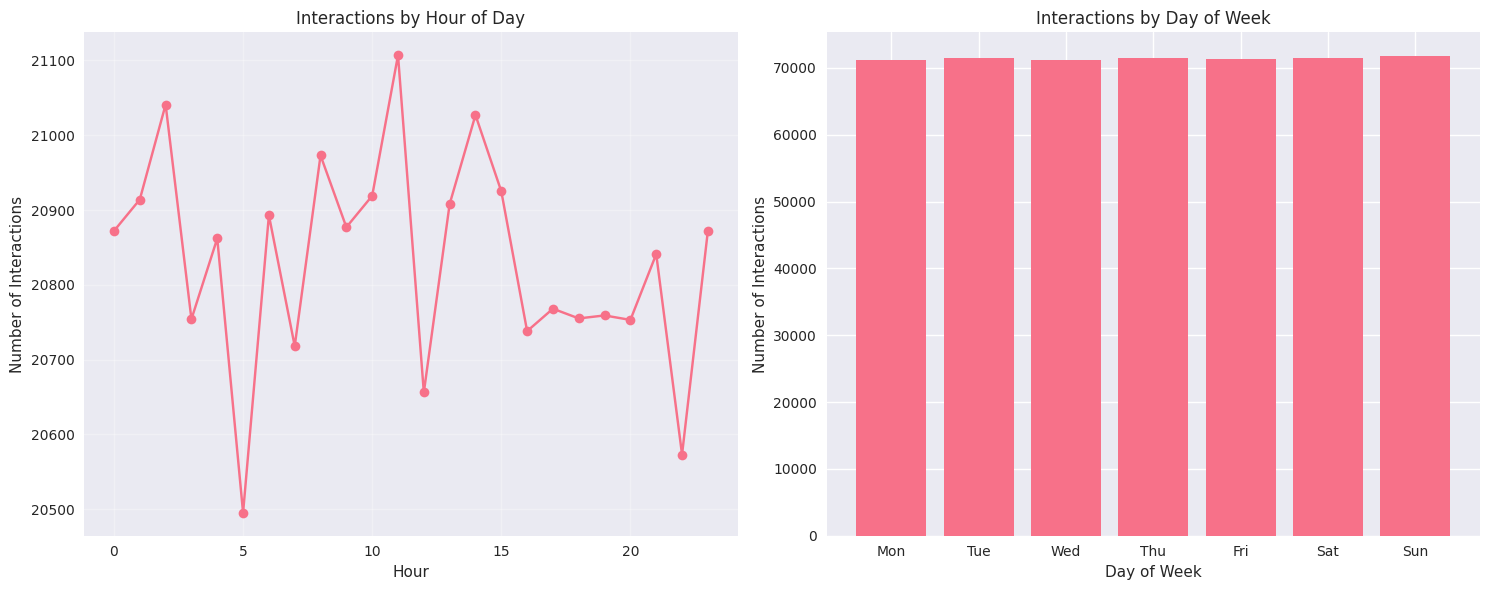

In [7]:

# ============================================================================
# TIME-BASED ANALYSIS
# ============================================================================

print(f"\n{'='*60}")
print("TIME-BASED ANALYSIS")
print(f"{'='*60}")

# Convert interaction_time to datetime
interactions_df['interaction_time'] = pd.to_datetime(interactions_df['interaction_time'])
interactions_df['interaction_hour'] = interactions_df['interaction_time'].dt.hour
interactions_df['interaction_day'] = interactions_df['interaction_time'].dt.dayofweek

# Interaction patterns by time
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Interactions by hour
hour_interactions = interactions_df['interaction_hour'].value_counts().sort_index()
axes[0].plot(hour_interactions.index, hour_interactions.values, marker='o')
axes[0].set_title('Interactions by Hour of Day')
axes[0].set_xlabel('Hour')
axes[0].set_ylabel('Number of Interactions')
axes[0].grid(True, alpha=0.3)

# Interactions by day of week
day_interactions = interactions_df['interaction_day'].value_counts().sort_index()
axes[1].bar(range(7), day_interactions.values)
axes[1].set_title('Interactions by Day of Week')
axes[1].set_xlabel('Day of Week')
axes[1].set_ylabel('Number of Interactions')
axes[1].set_xticks(range(7))
axes[1].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

plt.tight_layout()
plt.show()


In [8]:

# ============================================================================
# SUMMARY STATISTICS
# ============================================================================

print(f"\n{'='*60}")
print("SUMMARY STATISTICS")
print(f"{'='*60}")

print(f"\nDataset Overview:")
print(f"Total Users: {len(users_df):,}")
print(f"Total Events: {len(events_df):,}")
print(f"Total Interactions: {len(interactions_df):,}")
print(f"Unique Cities: {users_df['user_city'].nunique()}")
print(f"Event Categories: {events_df['category'].nunique()}")

print(f"\nInteraction Breakdown:")
positive_interactions = interactions_df[interactions_df['interaction_label'] == 1]
print(f"Positive Interactions: {len(positive_interactions):,} ({len(positive_interactions)/len(interactions_df)*100:.1f}%)")
print(f"Negative Interactions: {len(interactions_df) - len(positive_interactions):,} ({(len(interactions_df) - len(positive_interactions))/len(interactions_df)*100:.1f}%)")

print(f"\nCoverage Statistics:")
users_with_interactions = interactions_df['user_id'].nunique()
events_with_interactions = interactions_df['event_id'].nunique()
print(f"Users with interactions: {users_with_interactions:,} ({users_with_interactions/len(users_df)*100:.1f}% of all users)")
print(f"Events with interactions: {events_with_interactions:,} ({events_with_interactions/len(events_df)*100:.1f}% of all events)")

print(f"\nAverage Metrics:")
print(f"Average interactions per user: {len(interactions_df)/users_with_interactions:.2f}")
print(f"Average interactions per event: {len(interactions_df)/events_with_interactions:.2f}")
print(f"Average distance to event: {interactions_df['interaction_distance_to_event'].mean():.2f} km")

print("\nData exploration completed!")


SUMMARY STATISTICS

Dataset Overview:
Total Users: 50,000
Total Events: 10,000
Total Interactions: 500,000
Unique Cities: 10
Event Categories: 12

Interaction Breakdown:
Positive Interactions: 355,370 (71.1%)
Negative Interactions: 144,630 (28.9%)

Coverage Statistics:
Users with interactions: 49,914 (99.8% of all users)
Events with interactions: 9,999 (100.0% of all events)

Average Metrics:
Average interactions per user: 10.02
Average interactions per event: 50.01
Average distance to event: 46.70 km

Data exploration completed!


In [18]:
events_df["start_time"].max()

Timestamp('2025-11-21 19:54:11.729238')

In [36]:
print(f"\n{'='*60}")
print("DETAILED USER-EVENT RELATIONSHIP ANALYSIS")
print(f"{'='*60}")

# Calculate detailed statistics
print(f"\nUsers per Event Statistics:")
print(f"Mean: {users_per_event.mean():.2f}")
print(f"Median: {users_per_event.median():.2f}")
print(f"Standard Deviation: {users_per_event.std():.2f}")
print(f"Min: {users_per_event.min()}")
print(f"Max: {users_per_event.max()}")
print(f"25th Percentile: {users_per_event.quantile(0.25):.2f}")
print(f"75th Percentile: {users_per_event.quantile(0.75):.2f}")

print(f"\nEvents per User Statistics:")
print(f"Mean: {events_per_user.mean():.2f}")
print(f"Median: {events_per_user.median():.2f}")
print(f"Standard Deviation: {events_per_user.std():.2f}")
print(f"Min: {events_per_user.min()}")
print(f"Max: {events_per_user.max()}")
print(f"25th Percentile: {events_per_user.quantile(0.25):.2f}")
print(f"75th Percentile: {events_per_user.quantile(0.75):.2f}")


DETAILED USER-EVENT RELATIONSHIP ANALYSIS

Users per Event Statistics:
Mean: 5.69
Median: 2.00
Standard Deviation: 9.07
Min: 1
Max: 165
25th Percentile: 1.00
75th Percentile: 6.00

Events per User Statistics:
Mean: 5.31
Median: 1.00
Standard Deviation: 20.79
Min: 1
Max: 483
25th Percentile: 1.00
75th Percentile: 3.00
